In [1]:
### Load libraries -------
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import geopandas as gpd
from shapely.geometry import Point, Polygon
import numba
import math
from datetime import datetime
import numpy as np
import seaborn as sns
from dtaidistance import dtw, clustering
from dtaidistance import dtw_visualisation as dtwvis
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Pandas parameters
#pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_rows', 2000)
#pd.set_option('display.max_columns', 500)

In [2]:
### Define out paths ------

# check if out path exists, if it does not exists add the path
if not os.path.exists('/Users/hannahfrank/desktop/conflict_escalation_out'):
    os.makedirs('/Users/hannahfrank/desktop/conflict_escalation_out')

# add subfolders for the out path
out_paths = {
    "desciptive_plots_outcome": '/Users/hannahfrank/desktop/conflict_escalation_out/plots',
    "data": '/Users/hannahfrank/desktop/conflict_escalation_out/data'
}

for key, val in out_paths.items():
    if not os.path.exists(val):
        os.makedirs(val)
        
out_paths["data"]

'/Users/hannahfrank/desktop/conflict_escalation_out/data'

In [3]:
### Load data -------
ucdp = pd.read_csv(os.path.join(out_paths["data"], 
                                "ucdp.csv"))
ucdp.head(3)

,year_month,country_id,best,high,low,year,country
0,1989-01,700,691,1122,684,1989,Afghanistan
1,1989-02,700,160,160,41,1989,Afghanistan
2,1989-03,700,1744,6045,516,1989,Afghanistan


In [4]:
### Distance of two series in dynamic time warping -----
distance = dtw.distance(ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Myanmar (Burma)")].values, 
                        ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Iraq")].values)
print(distance)

121.90980272316087


(<Figure size 432x288 with 2 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>], dtype=object))

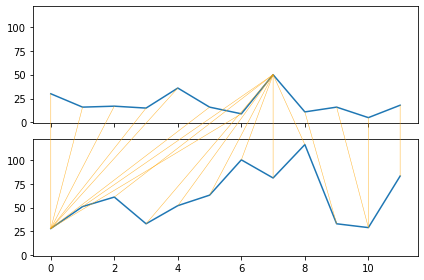

In [5]:
### Plot time series -----
path = dtw.warping_path(ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Myanmar (Burma)")].values, 
                        ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Iraq")].values)

dtwvis.plot_warping(ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Myanmar (Burma)")].values, 
                    ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Iraq")].values,
                    path)

In [6]:
### Save ----
path = dtw.warping_path(ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Myanmar (Burma)")].values, 
                        ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Iraq")].values)

dtwvis.plot_warping(ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Myanmar (Burma)")].values, 
                        ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Iraq")].values, 
                    path, 
                    filename=os.path.join(out_paths["desciptive_plots_outcome"], 
                                          f"_distance.png"))

(None, None)

(<Figure size 720x720 with 4 Axes>,
 [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>])

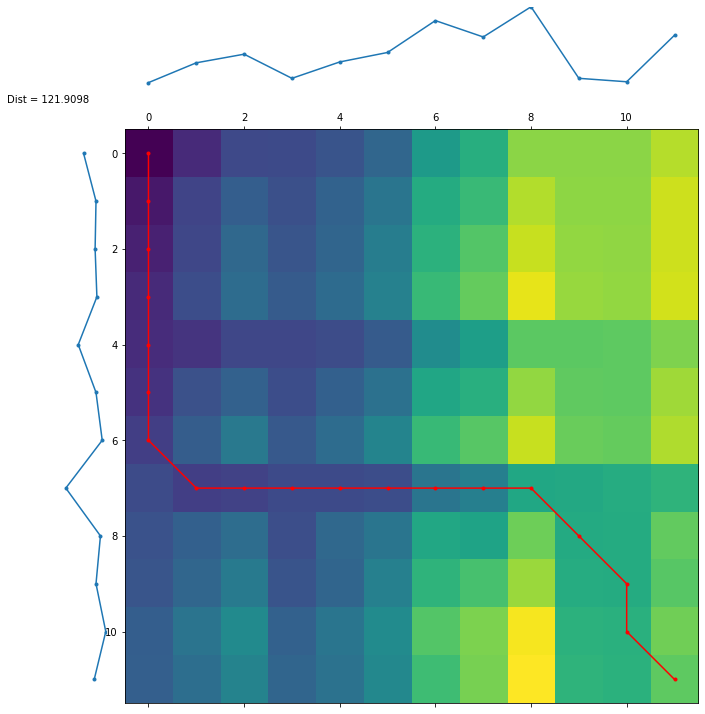

In [7]:
### Plot warping path ----
d, paths = dtw.warping_paths(ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Myanmar (Burma)")].values, 
                        ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Iraq")].values)
best_path = dtw.best_path(paths)

dtwvis.plot_warpingpaths(ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Myanmar (Burma)")].values, 
                        ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Iraq")].values, 
                         paths, 
                         best_path)

In [8]:
### Save warping path ----
d, paths = dtw.warping_paths(ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Myanmar (Burma)")].values, 
                        ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Iraq")].values)
best_path = dtw.best_path(paths)

dtwvis.plot_warpingpaths(ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Myanmar (Burma)")].values, 
                        ucdp["best"].loc[(ucdp["year"]==2019) &
                            (ucdp["country"]=="Iraq")].values,
                         paths, 
                         best_path,
                         filename=os.path.join(out_paths["desciptive_plots_outcome"], 
                                          f"_warp.png"))

(None, None)

In [9]:
### Import time series -----
ts_dict = open("ucdp_time_series.pkl", "rb")
ts_ucdp = pickle.load(ts_dict)
ts_ucdp['Afghanistan, 1997']

array([  69,  182,  243,  191, 1553,  605,  177,  210,  383,  425,   58,
         98])

In [10]:
### Calculate cost matrix ------
%time
ds = dtw.distance_matrix(list(ts_ucdp.values()))
ds

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 3.1 µs


array([[   0.        , 1345.97473973, 1643.62708666, ..., 1414.72364793,
        1184.62821172, 1688.5259844 ],
       [1345.97473973,    0.        ,  452.34610643, ...,  929.97526849,
         746.20573571,  451.44988648],
       [1643.62708666,  452.34610643,    0.        , ...,  875.27595648,
         791.78153553,  234.54850245],
       ...,
       [1414.72364793,  929.97526849,  875.27595648, ...,    0.        ,
         621.74271206,  811.83557449],
       [1184.62821172,  746.20573571,  791.78153553, ...,  621.74271206,
           0.        ,  806.03535903],
       [1688.5259844 ,  451.44988648,  234.54850245, ...,  811.83557449,
         806.03535903,    0.        ]])

In [11]:
### Transfer cost matrix into df -----
ds_df = pd.DataFrame(ds,
                 columns=list(ts_ucdp.keys()),
                 index=list(ts_ucdp.keys()))
ds_df

,"Afghanistan, 1989","Afghanistan, 1990","Afghanistan, 1991","Afghanistan, 1992","Afghanistan, 1993","Afghanistan, 1994","Afghanistan, 1995","Afghanistan, 1996","Afghanistan, 1997","Afghanistan, 1998",...,"Yemen (North Yemen), 2010","Yemen (North Yemen), 2011","Yemen (North Yemen), 2012","Yemen (North Yemen), 2013","Yemen (North Yemen), 2014","Yemen (North Yemen), 2015","Yemen (North Yemen), 2016","Yemen (North Yemen), 2017","Yemen (North Yemen), 2018","Yemen (North Yemen), 2019"
"Afghanistan, 1989",0.000000,1345.974740,1643.627087,1399.135447,1098.613672,1423.420879,1274.634065,1374.599942,766.962189,1665.849933,...,2108.084676,1799.118673,1426.837762,1937.181200,1659.278156,1379.089917,1484.987542,1414.723648,1184.628212,1688.525984
"Afghanistan, 1990",1345.974740,0.000000,452.346106,2074.451976,773.086670,1333.584643,1093.359044,343.504003,1124.670618,2132.644133,...,617.614767,530.736281,406.552580,563.725110,534.689630,1077.896099,607.628999,929.975268,746.205736,451.449886
"Afghanistan, 1991",1643.627087,452.346106,0.000000,2388.407210,817.618493,1333.383291,1239.864105,547.863122,1301.574047,2374.012847,...,543.067215,315.639034,503.368652,436.081414,284.255167,1473.577959,420.843201,875.275956,791.781536,234.548502
"Afghanistan, 1992",1399.135447,2074.451976,2388.407210,0.000000,1742.094429,2582.676519,2071.708474,2131.859986,1323.517284,1783.828187,...,2671.313909,2481.897863,2180.493522,2601.648708,2398.036488,2303.840923,2304.056423,2493.666778,2188.336126,2425.915703
"Afghanistan, 1993",1098.613672,773.086670,817.618493,1742.094429,0.000000,1363.879027,611.695186,839.842247,828.958986,1786.411487,...,1244.266852,987.382398,864.153921,1105.168313,898.358503,1143.164468,833.871693,1127.283460,761.543827,860.731085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yemen (North Yemen), 2015",1379.089917,1077.896099,1473.577959,2303.840923,1143.164468,1697.771775,827.792848,881.226986,938.362936,1369.147180,...,2112.342775,1634.036413,1025.366764,1899.206150,1445.287169,0.000000,1180.706145,1058.288241,741.236804,1515.857513
"Yemen (North Yemen), 2016",1484.987542,607.628999,420.843201,2304.056423,833.871693,1138.556103,1111.886685,399.576025,1223.163930,2124.996706,...,842.349096,434.661938,550.024545,623.342602,380.010526,1180.706145,0.000000,651.940948,496.981891,359.382804
"Yemen (North Yemen), 2017",1414.723648,929.975268,875.275956,2493.666778,1127.283460,949.790503,998.692645,738.428737,1382.975777,1928.197863,...,933.393808,817.491896,851.174483,716.818666,827.022370,1058.288241,651.940948,0.000000,621.742712,811.835574
"Yemen (North Yemen), 2018",1184.628212,746.205736,791.781536,2188.336126,761.543827,1032.620937,728.722855,509.146344,1006.961767,1849.013521,...,1391.641118,923.193912,598.996661,1169.837168,758.569707,741.236804,496.981891,621.742712,0.000000,806.035359


In [12]:
### Save cost matrix -----------
ds_df.to_csv(os.path.join(out_paths["data"], 
                            "ucdp_dtw_matrix.csv"), 
                             index=True, 
                             sep=',')
ds_df

,"Afghanistan, 1989","Afghanistan, 1990","Afghanistan, 1991","Afghanistan, 1992","Afghanistan, 1993","Afghanistan, 1994","Afghanistan, 1995","Afghanistan, 1996","Afghanistan, 1997","Afghanistan, 1998",...,"Yemen (North Yemen), 2010","Yemen (North Yemen), 2011","Yemen (North Yemen), 2012","Yemen (North Yemen), 2013","Yemen (North Yemen), 2014","Yemen (North Yemen), 2015","Yemen (North Yemen), 2016","Yemen (North Yemen), 2017","Yemen (North Yemen), 2018","Yemen (North Yemen), 2019"
"Afghanistan, 1989",0.000000,1345.974740,1643.627087,1399.135447,1098.613672,1423.420879,1274.634065,1374.599942,766.962189,1665.849933,...,2108.084676,1799.118673,1426.837762,1937.181200,1659.278156,1379.089917,1484.987542,1414.723648,1184.628212,1688.525984
"Afghanistan, 1990",1345.974740,0.000000,452.346106,2074.451976,773.086670,1333.584643,1093.359044,343.504003,1124.670618,2132.644133,...,617.614767,530.736281,406.552580,563.725110,534.689630,1077.896099,607.628999,929.975268,746.205736,451.449886
"Afghanistan, 1991",1643.627087,452.346106,0.000000,2388.407210,817.618493,1333.383291,1239.864105,547.863122,1301.574047,2374.012847,...,543.067215,315.639034,503.368652,436.081414,284.255167,1473.577959,420.843201,875.275956,791.781536,234.548502
"Afghanistan, 1992",1399.135447,2074.451976,2388.407210,0.000000,1742.094429,2582.676519,2071.708474,2131.859986,1323.517284,1783.828187,...,2671.313909,2481.897863,2180.493522,2601.648708,2398.036488,2303.840923,2304.056423,2493.666778,2188.336126,2425.915703
"Afghanistan, 1993",1098.613672,773.086670,817.618493,1742.094429,0.000000,1363.879027,611.695186,839.842247,828.958986,1786.411487,...,1244.266852,987.382398,864.153921,1105.168313,898.358503,1143.164468,833.871693,1127.283460,761.543827,860.731085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Yemen (North Yemen), 2015",1379.089917,1077.896099,1473.577959,2303.840923,1143.164468,1697.771775,827.792848,881.226986,938.362936,1369.147180,...,2112.342775,1634.036413,1025.366764,1899.206150,1445.287169,0.000000,1180.706145,1058.288241,741.236804,1515.857513
"Yemen (North Yemen), 2016",1484.987542,607.628999,420.843201,2304.056423,833.871693,1138.556103,1111.886685,399.576025,1223.163930,2124.996706,...,842.349096,434.661938,550.024545,623.342602,380.010526,1180.706145,0.000000,651.940948,496.981891,359.382804
"Yemen (North Yemen), 2017",1414.723648,929.975268,875.275956,2493.666778,1127.283460,949.790503,998.692645,738.428737,1382.975777,1928.197863,...,933.393808,817.491896,851.174483,716.818666,827.022370,1058.288241,651.940948,0.000000,621.742712,811.835574
"Yemen (North Yemen), 2018",1184.628212,746.205736,791.781536,2188.336126,761.543827,1032.620937,728.722855,509.146344,1006.961767,1849.013521,...,1391.641118,923.193912,598.996661,1169.837168,758.569707,741.236804,496.981891,621.742712,0.000000,806.035359
